ref : https://www.kaggle.com/competitions/bike-sharing-demand/data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data Field
<pre>
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

# Data Load
* 일반적으로 로드할 때 날짜처리하는 것이 일반적
    * parse_dates = ['datetime']

In [3]:
train = pd.read_csv('./train.csv')
# train = pd.read_csv('./train.csv', parse_dates = ['datetime'])


## 구조확인
<pre>
*df.head()
*df.info()
*df.shape

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.shape

(10886, 12)

## 컬럼명 변경
* datetime은 예약어
* df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)

In [7]:
train.rename(columns = {'datetime' : 'regdate', 'count':'regcount'}, inplace = True)
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

## 컬럼명 소문자화

In [8]:
train.columns = train.columns.str.lower()
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount'],
      dtype='object')

In [9]:
#train.columns = ['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
#      'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
# 리스트를 넣어도 됨

## 결측체크

In [10]:
train.isna().sum()

regdate       0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
regcount      0
dtype: int64

## object 체크

In [11]:
train.select_dtypes('object').columns

Index(['regdate'], dtype='object')

## regdate 타입변환
* objcet(str) --> datetime

### (Class) datetime 날짜 타입 변환

In [12]:
from datetime import datetime

In [13]:
datetime.strptime('2020-12-14 20:12:59','%Y-%m-%d %H:%M:%S')

datetime.datetime(2020, 12, 14, 20, 12, 59)

In [14]:
datetime.fromisoformat('2020-12-14 20:12:59')

datetime.datetime(2020, 12, 14, 20, 12, 59)

In [15]:
datetime.fromisoformat('2020-12-14 20:12:59')

datetime.datetime(2020, 12, 14, 20, 12, 59)

### pd.read_csv(.....parse_dates = ['columns'])

### ★ pd.to_datetime(df['columns']) 

In [16]:
train['regdate_datetype22'] = pd.to_datetime(train['regdate'])
train.head()

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,regdate_datetype22
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


### ★ ['column'].astype('type')

In [17]:
train['regdate_datetype33'] = train['regdate'].astype('datetime64')
train.head()

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,regdate_datetype22,regdate_datetype33
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01 04:00:00


### apply(lambda x:)

In [18]:
train['regdate_date'] = train['regdate'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S') )

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   regdate             10886 non-null  object        
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  regcount            10886 non-null  int64         
 12  regdate_datetype22  10886 non-null  datetime64[ns]
 13  regdate_datetype33  10886 non-null  datetime64

## EDA

In [20]:
train = pd.read_csv('./train.csv', parse_dates = ['datetime'])

In [21]:
test = pd.read_csv('./test.csv', parse_dates = ['datetime'])

In [22]:
train = train.rename(columns = {'datetime':'regdate','count':'regcount'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [23]:
test = test.rename(columns = {'datetime':'regdate'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


## regdate

In [24]:
train['regdate'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: regdate, dtype: datetime64[ns]

In [25]:
train['y']= train['regdate'].dt.year
train['m']= train['regdate'].dt.month
train['d']= train['regdate'].dt.day
train['h']= train['regdate'].dt.hour

In [26]:
test['y']= test['regdate'].dt.year
test['m']= test['regdate'].dt.month
test['d']= test['regdate'].dt.day
test['h']= test['regdate'].dt.hour

In [27]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
 12  y           10886 non-null  int64         
 13  m           10886 non-null  int64         
 14  d           10886 non-null  int64         
 15  h           10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [28]:
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   y           6493 non-null   int64         
 10  m           6493 non-null   int64         
 11  d           6493 non-null   int64         
 12  h           6493 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 659.6 KB


## index 지정
*머신러닝은 인덱스값은 학습에서 제외한다. 버리기 묘한 칼럼은 인덱스로

In [29]:
# train = train.set_index('regdate')
train.head()
# 'regdate' index 지정

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [30]:
# train = train.reset_index()
# index 지정 해제

## casual	registered	count	

In [31]:
train[ train['regcount'] == train['casual'] + train['registered'] ].shape

(10886, 16)

# EDA

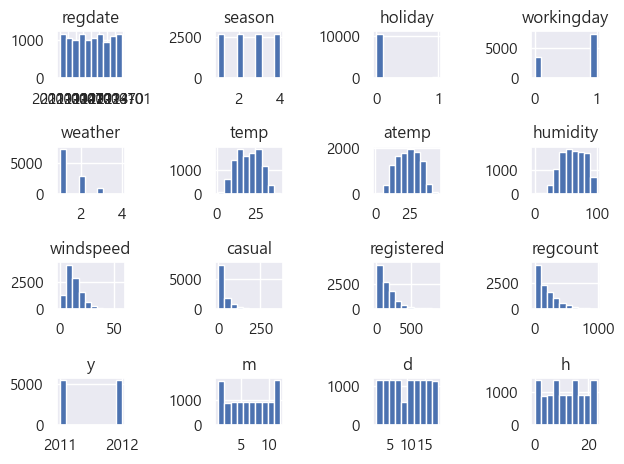

In [32]:
train.hist()
plt.tight_layout()

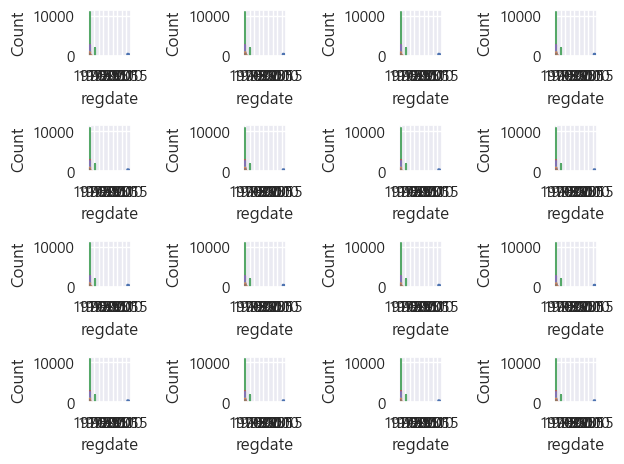

In [33]:
fig, axes = plt.subplots(4, 4)
for num in [0,1,2,3]:
    for num1 in [0,1,2,3]:
        for col in train.columns:
            sns.histplot(data = train, x = col, ax = axes[num][num1] ,kde =True )
 
plt.tight_layout()
plt.show()

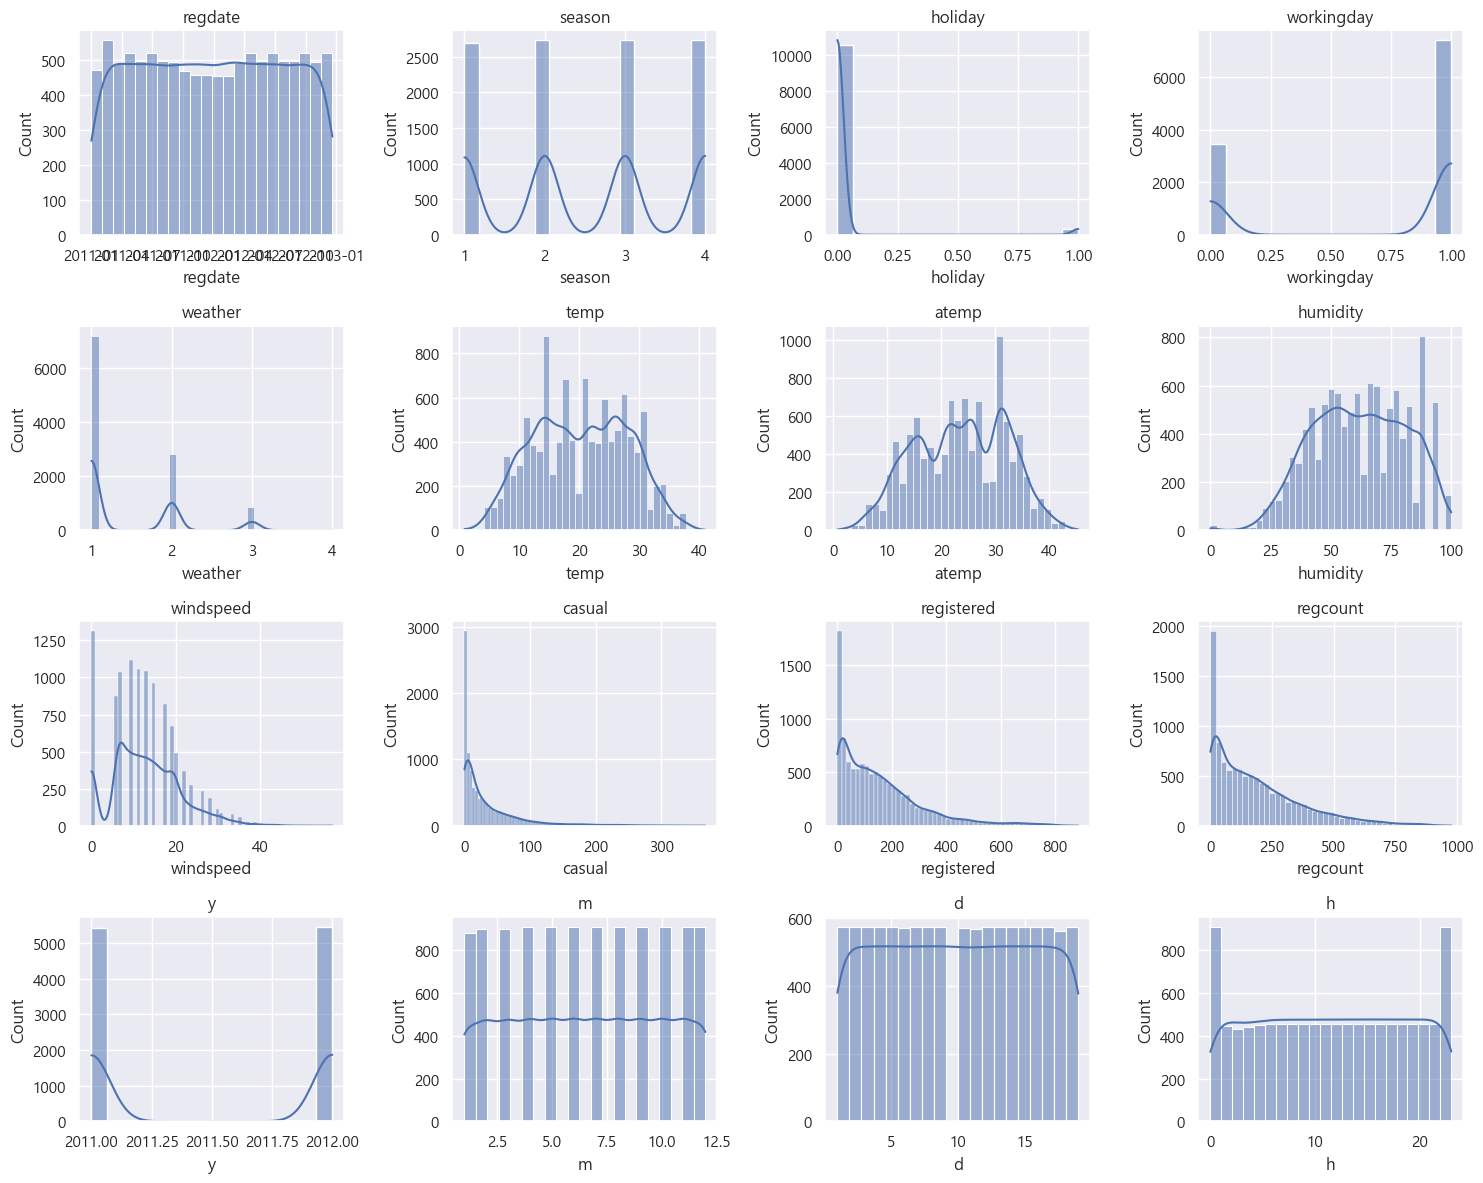

In [34]:
fig, axes = plt.subplots(4, 4, figsize = (15,12))

for i, col in enumerate(train.columns):
    r = i//4
    c = i%4
    axes[r][c].set_title(col)
    sns.histplot(data = train, x = col, ax = axes[r][c] ,kde =True )
plt.tight_layout()
plt.show()


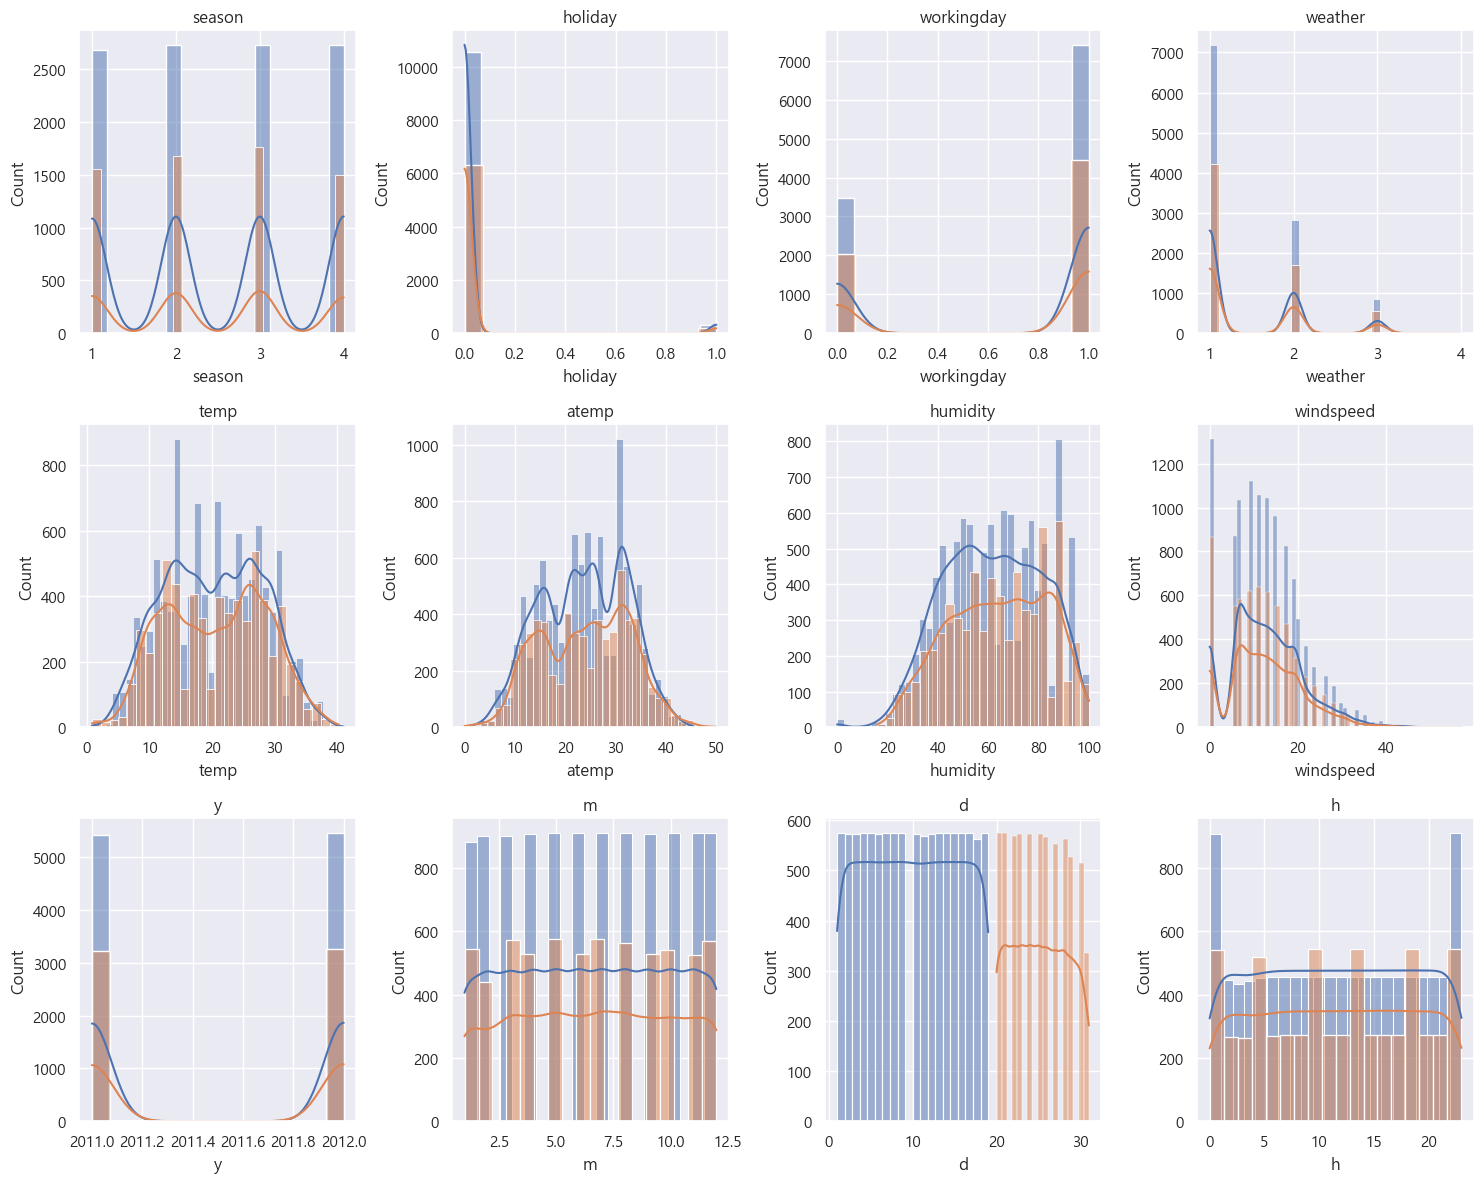

In [35]:
fig, axes = plt.subplots(3, 4, figsize = (15,12))
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'y','m', 'd', 'h']
for i, col in enumerate(col_list):
    r = i//4
    c = i%4
    axes[r][c].set_title(col)
    sns.histplot(data = train, x = col, ax = axes[r][c] ,kde =True )
    sns.histplot(data = test, x = col, ax = axes[r][c] ,kde =True )
plt.tight_layout()
plt.show()

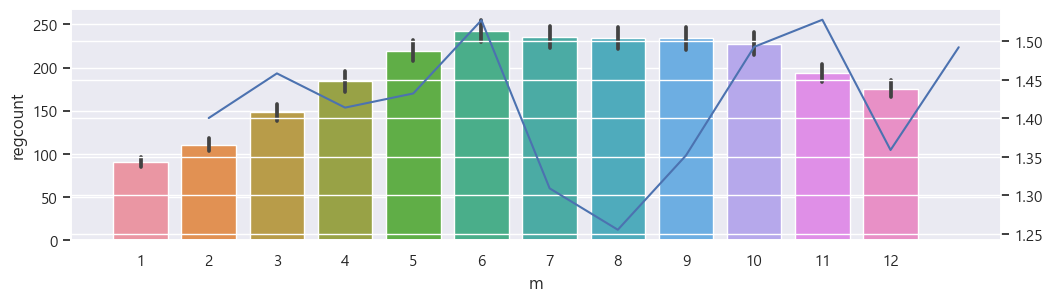

In [36]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['weather']].mean() )

plt.show()


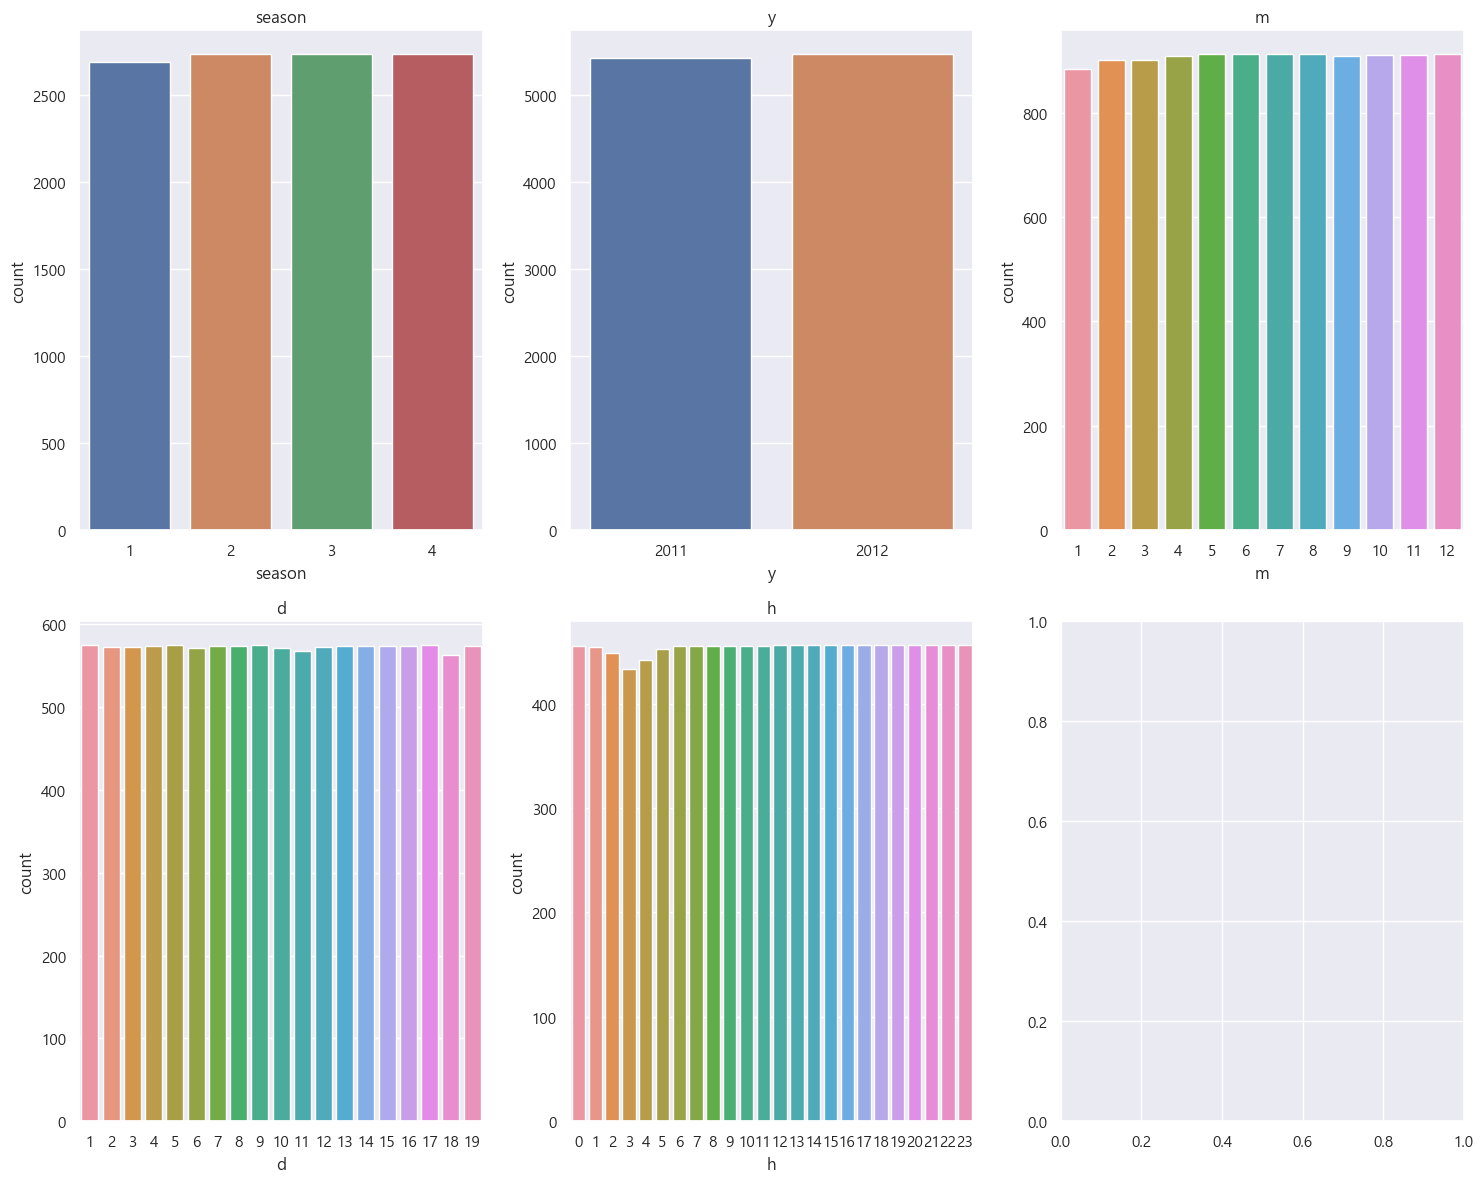

In [37]:
fig, axes = plt.subplots(2,3, figsize = (15,12))

axes[0][0].set_title('season')
sns.countplot(data = train, x ='season', ax = axes[0][0])

axes[0][1].set_title('y')
sns.countplot(data = train, x =  'y', ax = axes[0][1])

axes[0][2].set_title('m')
sns.countplot(data = train, x = 'm', ax = axes[0][2])

axes[1][0].set_title('d')
sns.countplot(data = train, x = 'd', ax = axes[1][0])

axes[1][1].set_title('h')
sns.countplot(data = train, x = 'h', ax = axes[1][1])

plt.tight_layout()
plt.show()

# train['season'].value_counts().plot(kind = 'bar')
# row수 세기 의미xxxx

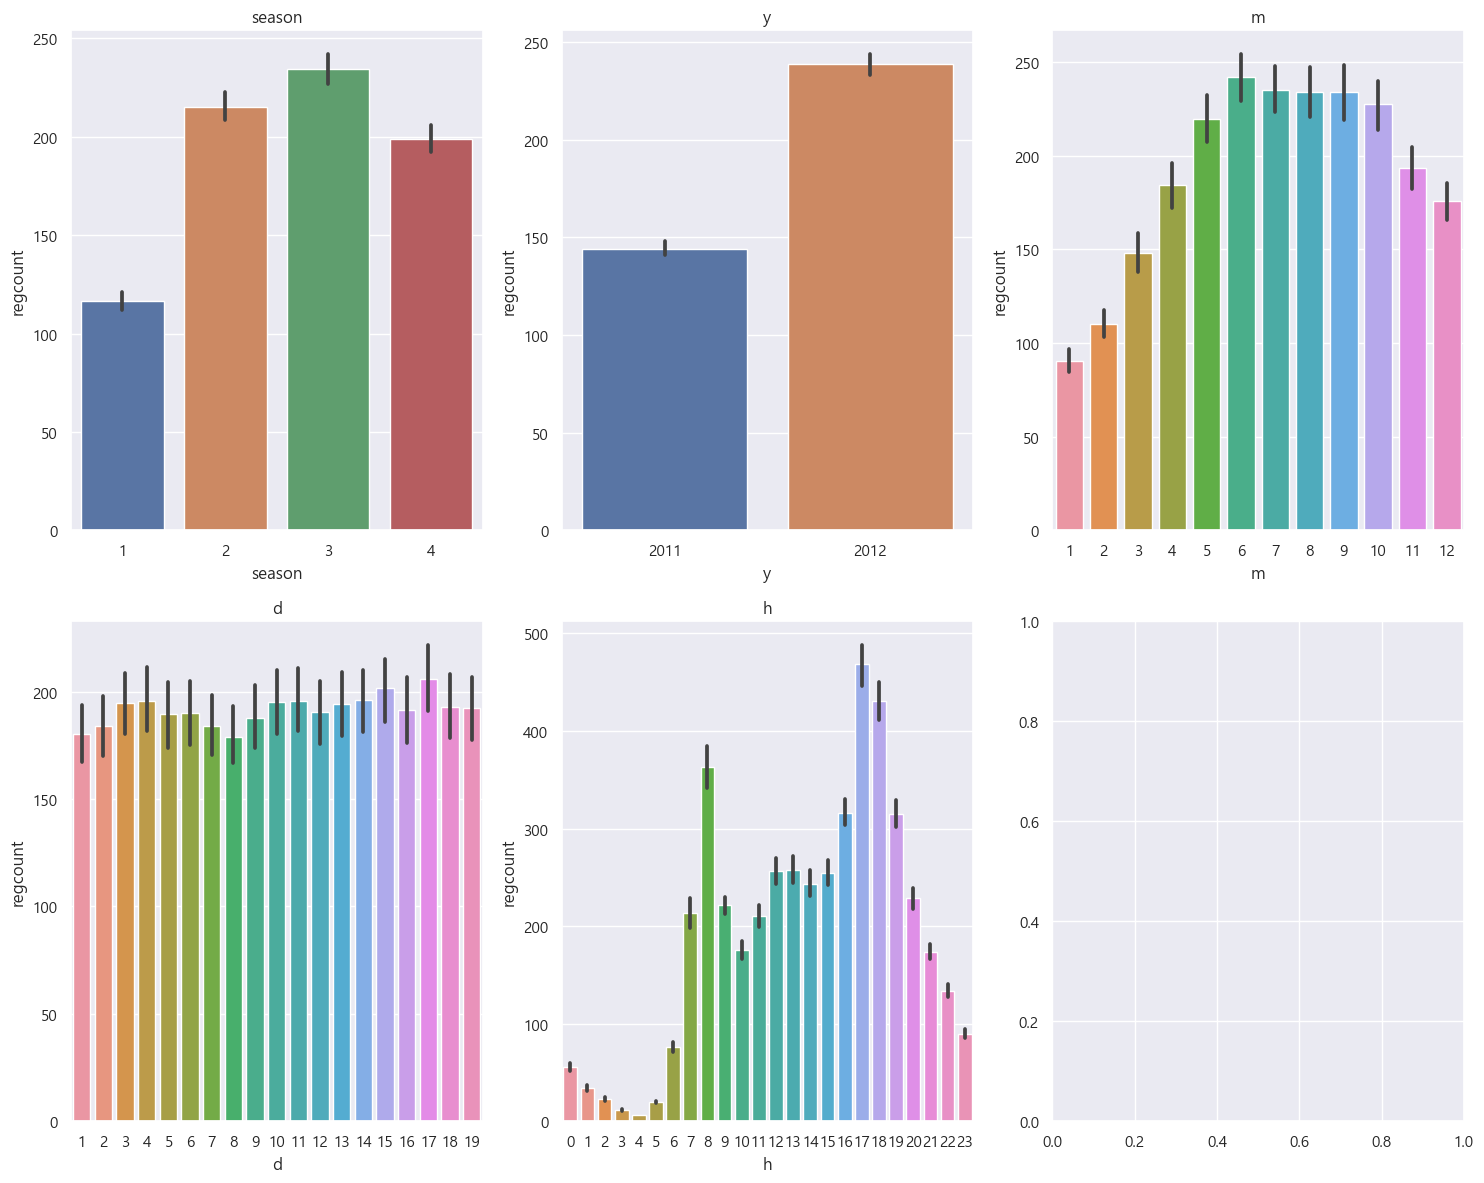

In [38]:
fig, axes = plt.subplots(2,3, figsize = (15,12))

axes[0][0].set_title('season')
sns.barplot(data = train, x ='season', y = 'regcount',ax = axes[0][0])

axes[0][1].set_title('y')
sns.barplot(data = train, x =  'y', y = 'regcount', ax = axes[0][1])

axes[0][2].set_title('m')
sns.barplot(data = train, x = 'm', y = 'regcount', ax = axes[0][2])

axes[1][0].set_title('d')
sns.barplot(data = train, x = 'd', y = 'regcount', ax = axes[1][0])

axes[1][1].set_title('h')
sns.barplot(data = train, x = 'h', y = 'regcount', ax = axes[1][1])

plt.tight_layout()
plt.show()

# print(  train.groupby('season')['regcount'].mean()  )
# train.groupby('season')['regcount'].mean().plot(kind = 'bar')

In [39]:
train.head()

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [40]:
train['w']=train['regdate'].dt.dayofweek
train.head()
# 월: 0 / 일: 6

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,w
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [41]:
# train['w'] = train.index.dayofweek
# regdate를 index로 활용하고  있을 떄

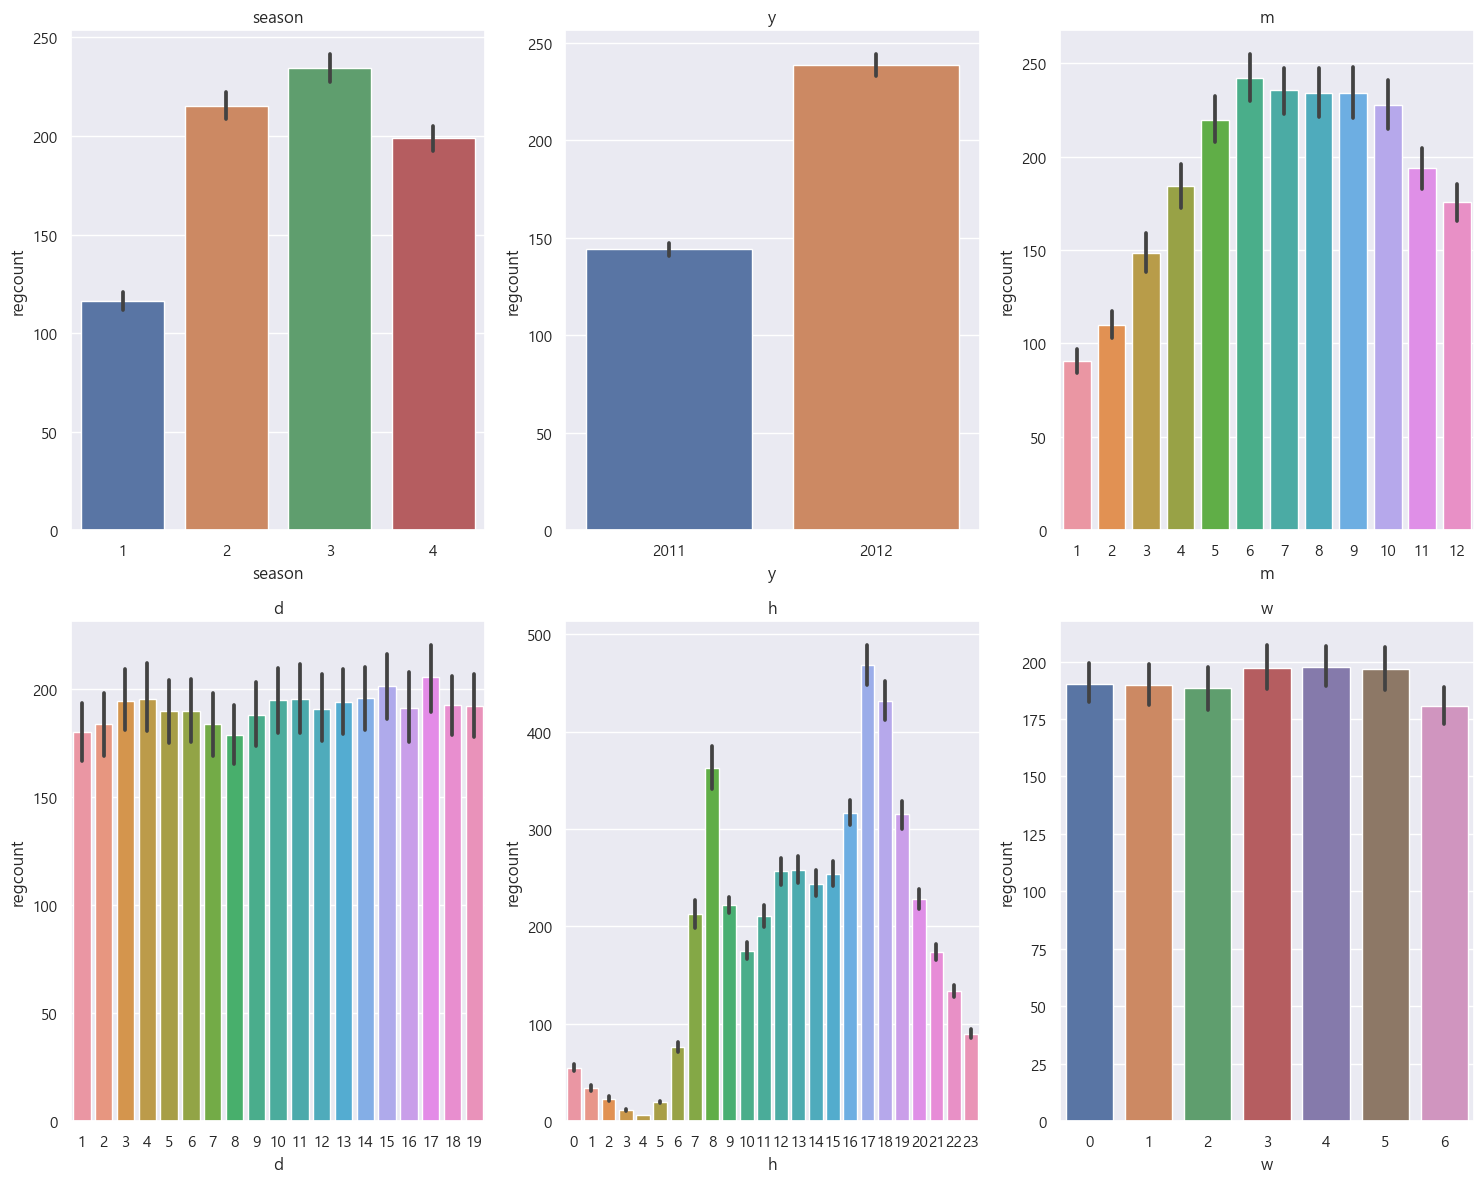

In [42]:
fig, axes = plt.subplots(2,3, figsize = (15,12))

axes[0][0].set_title('season')
sns.barplot(data = train, x ='season', y = 'regcount',ax = axes[0][0])

axes[0][1].set_title('y')
sns.barplot(data = train, x =  'y', y = 'regcount', ax = axes[0][1])

axes[0][2].set_title('m')
sns.barplot(data = train, x = 'm', y = 'regcount', ax = axes[0][2])

axes[1][0].set_title('d')
sns.barplot(data = train, x = 'd', y = 'regcount', ax = axes[1][0])

axes[1][1].set_title('h')
sns.barplot(data = train, x = 'h', y = 'regcount', ax = axes[1][1])

axes[1][2].set_title('w')
sns.barplot(data = train, x = 'w', y = 'regcount', ax = axes[1][2])

plt.tight_layout()
plt.show()

In [43]:
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount',
       'y', 'm', 'd', 'h', 'w'],
      dtype='object')

holyday  workingday
0          0          > [0] 주말
           1          > [1] 월~금 워킹데이 
1          0          > [2] 공휴일

## np where

In [44]:
train['day_type'] = 0
train['day_type'] = np.where( (train['holiday']==0) & (train['workingday'] == 1),   1,  train['day_type'])
train['day_type'] = np.where( (train['holiday']==1) & (train['workingday'] == 0),   2,  train['day_type'])
train.head()


,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,w,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,0


## lambda x

In [45]:
traincp =train.copy()
def mydef(x):
    day_type =0
    if x['holiday'] ==0 and x['workingday'] ==0 :
        day_type =0
    if x['holiday'] ==0 and x['workingday'] ==1 :
        day_type =1
    if x['holiday'] ==1 and x['workingday'] ==0 :
        day_type =2
    return day_type
# 함수 1개당 return은 한개만

traincp['day_type1'] = traincp.apply(lambda df : mydef(df), axis =1)
traincp

,regdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,regcount,y,m,d,h,w,day_type,day_type1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2,1,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2,1,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2,1,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2,1,1


## df.loc[] = 변경값

In [46]:
idx0 = train[(train['holiday']==0) & (train['workingday'] == 0)].index
idx1 = train[(train['holiday']==0) & (train['workingday'] == 1)].index
idx2 = train[train['holiday']==1].index

train.loc[idx0, 'day_type'] = 0
train.loc[idx1, 'day_type'] = 1
train.loc[idx2, 'day_type'] = 2
train['day_type'] = train['day_type'].astype('int')

<Axes: xlabel='day_type'>

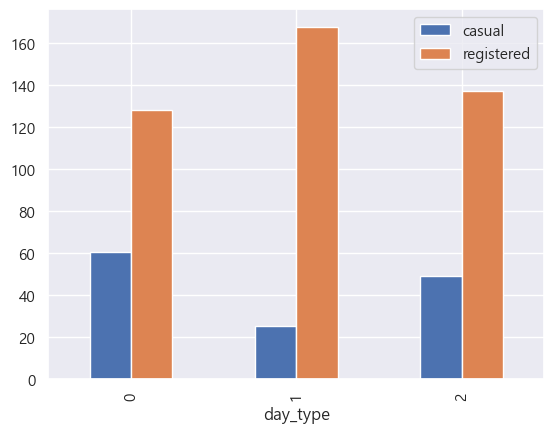

In [47]:
g = train.groupby('day_type')[['casual','registered']]
(g.sum()/g.count()).plot(kind = 'bar')  
# 주말/ 평일/ 공휴일

### 주말

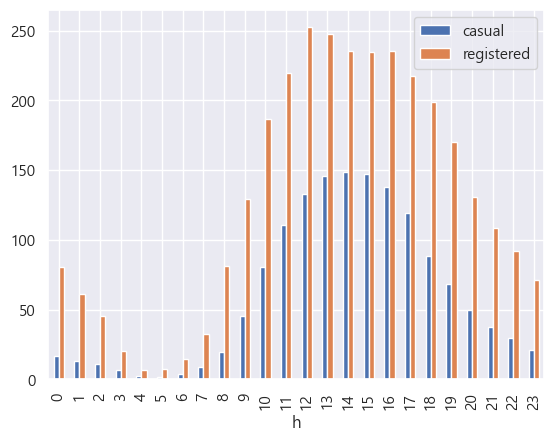

In [48]:
g1= train[train['day_type']==0].groupby('h')[['casual','registered']].mean().plot(kind = 'bar')
# (g1.sum()/g1.count()).plot(kind = 'bar')

### 평일

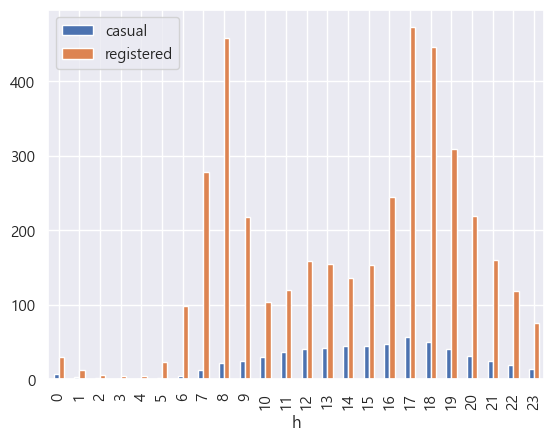

In [49]:
g2= train[train['day_type']==1].groupby('h')[['casual','registered']].mean().plot(kind = 'bar')
# (g2.sum()/g2.count()).plot(kind = 'bar')

### 공휴일

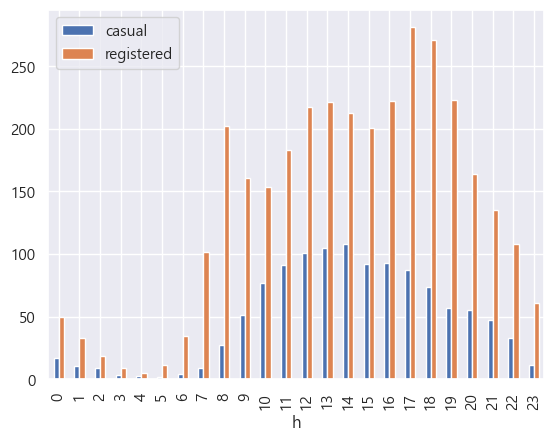

In [50]:
g3= train[train['day_type']==2].groupby('h')[['casual','registered']].mean().plot(kind = 'bar')
# (g3.sum()/g3.count()).plot(kind = 'bar')

### 주말, 평일, 공휴일 한번에 보여주기

## 시간별

<Axes: title={'center': 'casual'}, xlabel='h'>

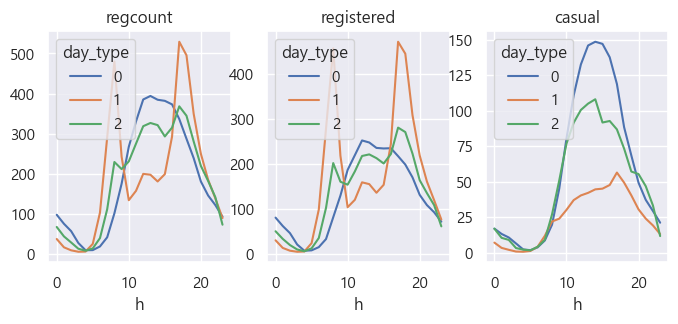

In [51]:
ax1 = plt.subplot(1,3,1)
temp = train.pivot_table(index = 'h', columns = 'day_type', values = 'regcount')
ax1.set_title('regcount')
temp.plot(ax =ax1, figsize = (8,3))

ax2 = plt.subplot(1,3,2)
temp = train.pivot_table(index = 'h', columns = 'day_type', values = 'registered')
ax2.set_title('registered')
temp.plot(ax =ax2, figsize = (8,3))

ax3 = plt.subplot(1,3,3)
temp = train.pivot_table(index = 'h', columns = 'day_type', values = 'casual')
ax3.set_title('casual')
temp.plot(ax =ax3, figsize = (8,3))

## 요일별

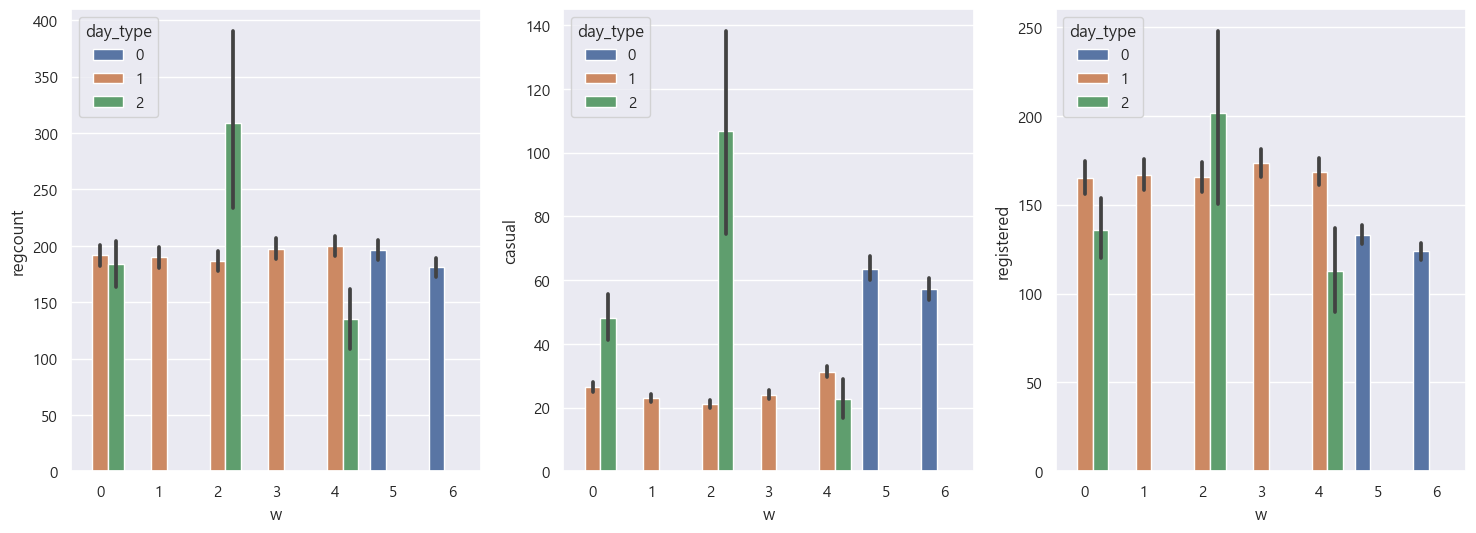

In [52]:
plt.figure(figsize = (18,6))

ax1 = plt.subplot(1,3,1)
sns.barplot(data = train, x ='w', y = 'regcount', hue = 'day_type', ax=ax1)

ax2 = plt.subplot(1,3,2)
sns.barplot(data = train, x ='w', y = 'casual', hue = 'day_type', ax=ax2)


ax3 = plt.subplot(1,3,3)
sns.barplot(data = train, x ='w', y = 'registered', hue = 'day_type', ax=ax3)



plt.show()

# 주말(5,6)/평일/공휴일
# 월화수목금토일

## 월별

<Axes: title={'center': 'casual'}, xlabel='m'>

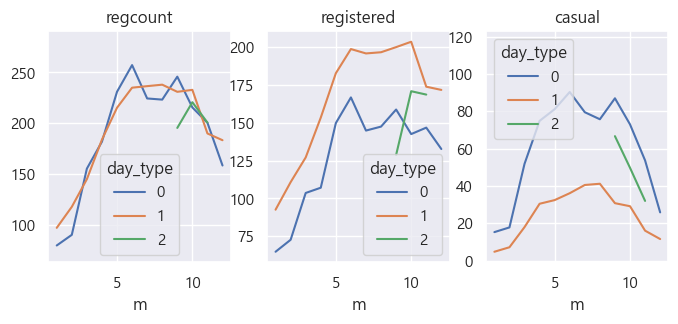

In [53]:
ax1 = plt.subplot(1,3,1)
temp = train.pivot_table(index = 'm', columns = 'day_type', values = 'regcount')
ax1.set_title('regcount')
temp.plot( ax =ax1, figsize = (8,3))

ax2 = plt.subplot(1,3,2)
temp = train.pivot_table(index = 'm', columns = 'day_type', values = 'registered')
ax2.set_title('registered')
temp.plot(ax =ax2, figsize = (8,3))

ax3 = plt.subplot(1,3,3)
temp = train.pivot_table(index = 'm', columns = 'day_type', values = 'casual')
ax3.set_title('casual')
temp.plot(ax =ax3, figsize = (8,3))

## 계절성
* 'weather', 'temp','atemp', 'humidity', 'windspeed'

In [54]:
# sns.heatmap(   
#                 data=train[['regcount','registered','casual','season','weather', 'temp','atemp', 'humidity', 'windspeed']].corr(),
#                 cmap='coolwarm',  #'Blues', 
#                 annot=True, fmt='.2f', 
#                 cbar=True
#                )

# plt.show()

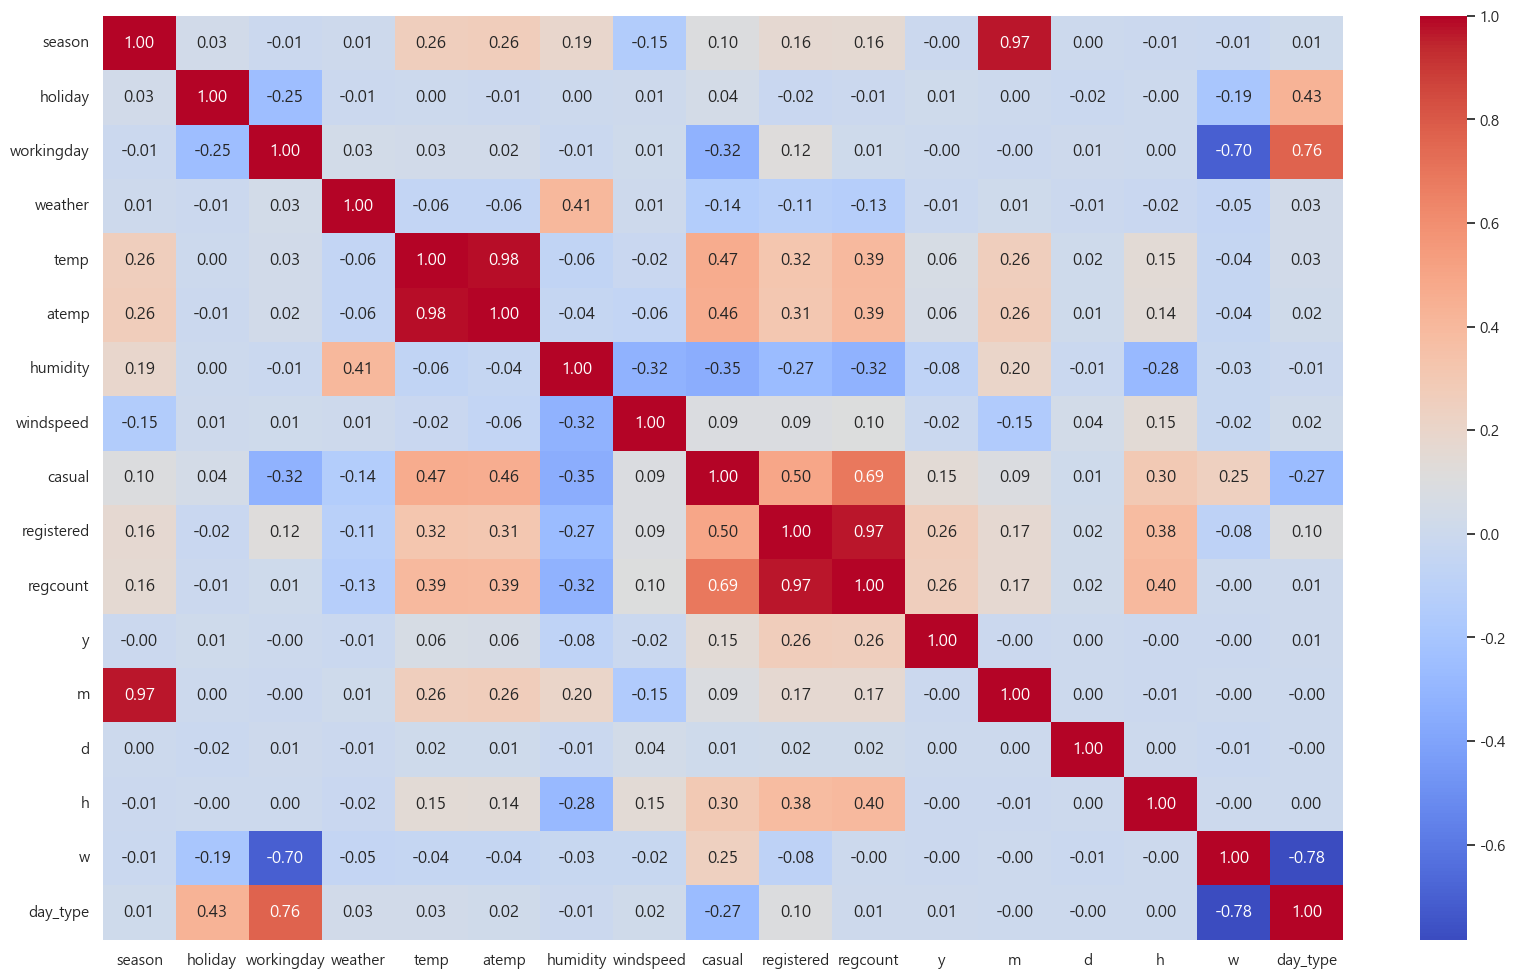

In [55]:
plt.figure(figsize = (20,12))
sns.heatmap(   
                data=train.corr(),
                cmap='coolwarm',  #'Blues', 
                annot=True, fmt='.2f', 
                cbar=True
               )

plt.show()

# 시간별

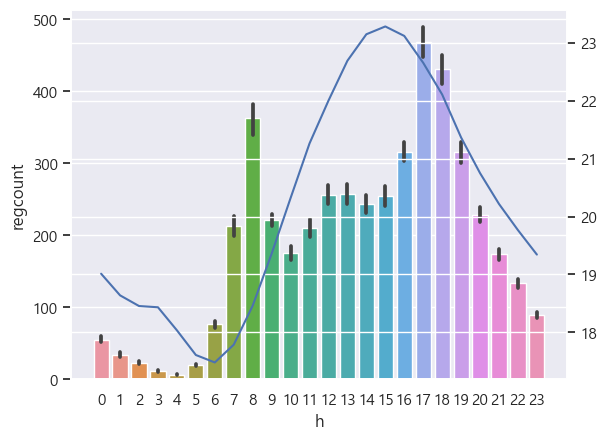

In [56]:
fig, axes = plt.subplots()
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['temp']].mean() )

plt.show()

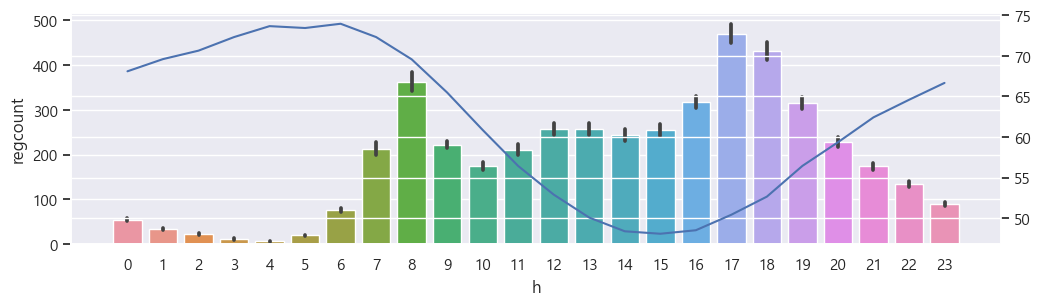

In [57]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['humidity']].mean() )

plt.show()

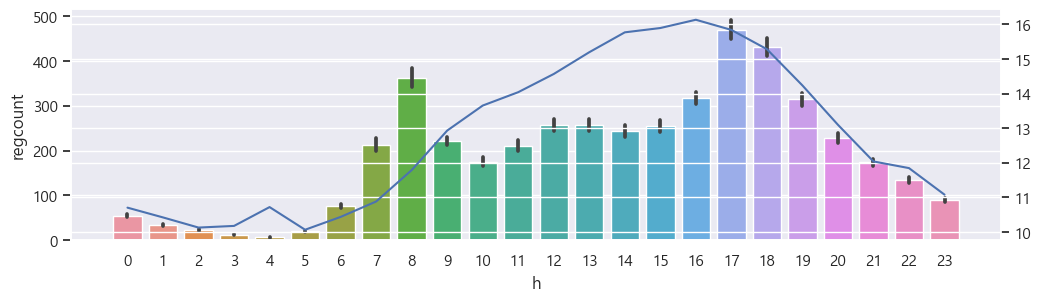

In [58]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['windspeed']].mean() )

plt.show()

# 월별

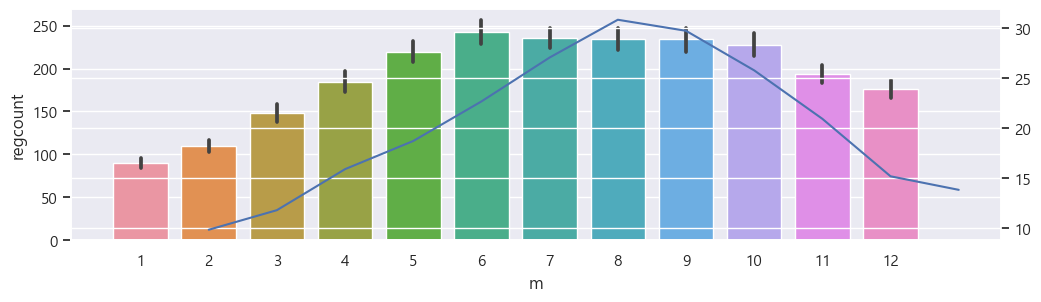

In [59]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['temp']].mean() )

plt.show()

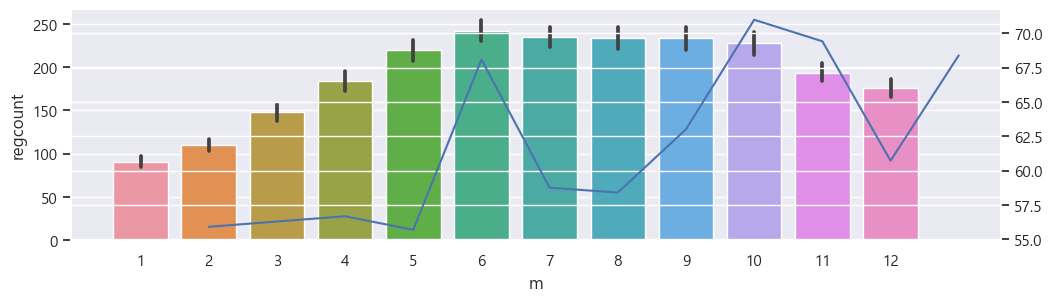

In [60]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['humidity']].mean() )

plt.show()

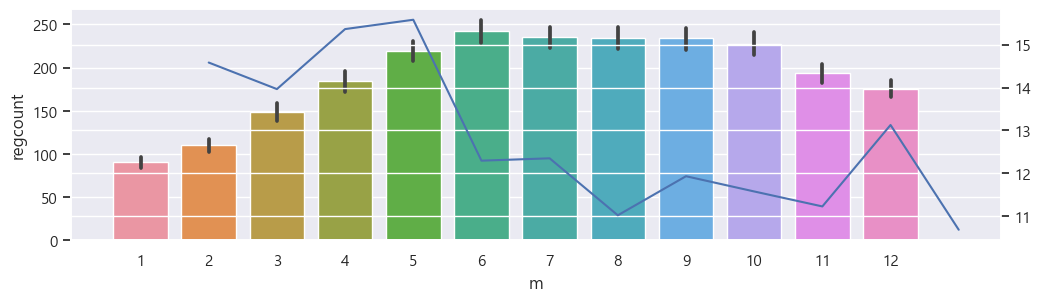

In [61]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['windspeed']].mean() )

plt.show()

# weather

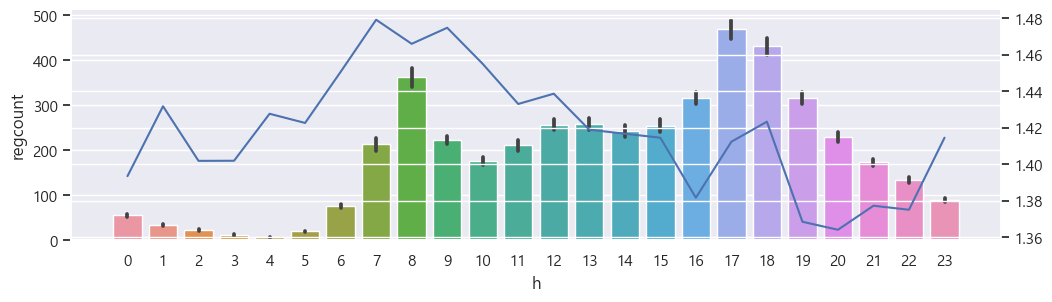

In [62]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="h", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("h")[['weather']].mean() )

plt.show()

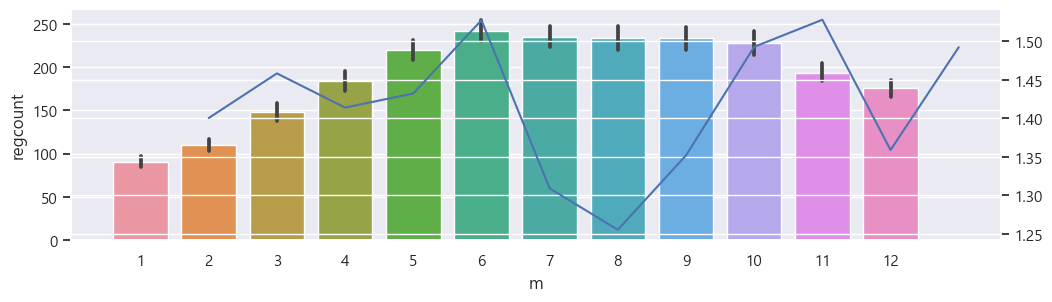

In [63]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="m", y="regcount", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("m")[['weather']].mean() )

plt.show()


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   regdate     10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  regcount    10886 non-null  int64         
 12  y           10886 non-null  int64         
 13  m           10886 non-null  int64         
 14  d           10886 non-null  int64         
 15  h           10886 non-null  int64         
 16  w           10886 non-

## 최종피쳐 선정

In [65]:
train.columns

Index(['regdate', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'regcount',
       'y', 'm', 'd', 'h', 'w', 'day_type'],
      dtype='object')

<pre>
타겟(1) : 'casual' + 'registered'
타겟(2) : 'regcount'


'd' 피쳐 삭제
('m', 'h'),  'y', 'd' -->'w'


(+)3개 : 'holiday', 'workingday', 'day_type'
(+)2개 : 'holiday', 'workingday'
(+)1개 : 'day_type'


'weather', 'humidity',  'season', 
(+)'windspeed' : 'h' 비례? / 'm' 반비례?


다중공선 : (상관계수가 높은 경우)
'regcount' 'registered' 'casual' : 0.97  --> 'regcount' vs. 'registered'+'casual'
'temp' 'atemp'                   : 0.98  --> 'atemp' drop

선택적으로 모델에 적용
(+)'w' 'day_type' : -0.78
(+)'season' 'm'   : 0.97


* ('m', 'h'),  'y', 'w', 'weather', 'humidity',  'season', 'temp'
* (+)'windspeed'
* (+)('holiday', 'workingday'), ('day_type')
* (+)('w' 'day_type') : -0.78
* (+)('m') 'season'    : 0.97


# windspeed 0 채우기

In [66]:
# df['windspeed'].hist()
# train['windspeed'].value_counts()
# 풍속이 '0'일수는 있지만, "1313"는 너무 많다 >> 0 처리

In [67]:
len(train[train['windspeed']==0]), len(train[train['windspeed']!=0])

(1313, 9573)

In [86]:
df_test = train[train['windspeed']==0]
df_train = train[train['windspeed']!=0]

In [70]:
df_test .shape, df_train.shape

((1313, 18), (9573, 18))

In [77]:
y_df_test = df_test['windspeed']
X_df_test = df_test.drop(['windspeed','regdate'], axis=1)

y_df_train = df_train['windspeed']
X_df_train = df_train.drop(['windspeed','regdate'], axis=1)
X_df_train.shape, y_df_train.shape, X_df_test.shape, y_df_test.shape

((9573, 16), (9573,), (1313, 16), (1313,))

In [79]:
le = LinearRegression()
le.fit(X_df_train,y_df_train)
pred = le.predict(X_df_test)
pred.shape

(1313,)

In [80]:
train[train['windspeed']==0].shape

(1313, 18)

In [88]:
widx = y_df_test.index.values
train.loc[widx, 'windspeed'] = pred

In [89]:
train[train['windspeed']==0].shape

(0, 18)

* test

In [ ]:
# tw0 = test[test['windspeed']==0]
# tw1 = test[test['windspeed']!=0]

In [ ]:
# tw0.shape

# 모델학습
* 개념만 학습/ ML파트 참고

In [ ]:
# !pip install xgboost
# !pip install lightgbm

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------- 추가모델
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
y= train[['casual','registered','regcount']]
X= train.drop(['casual','registered','regcount','y','m','d','day_type','atemp','regcount','regdate'], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1212)


In [ ]:
train.info()

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

In [ ]:
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)


In [ ]:
model_list = [ ("DTR"   , DecisionTreeRegressor(random_state=0)),
               ("LR"    , LinearRegression()                   ),
               ("ABOOST", AdaBoostRegressor()                  ),
               ("XGB"   , XGBRegressor()                       ),  
               ("LGBM"  , LGBMRegressor()                      ),
               ("VR"    , VotingRegressor([("XGB", XGBRegressor()), ("LGBM", LGBMRegressor())]) ) 
             ]
y_list = [ train['regcount'], train['casual'], train['registered'] ]
y_col  = [ 'regcount', 'casual', 'registered'] 
X = train.drop(['regcount','casual','registered','regdate'], axis=1)

score_list = []
for tpl in model_list :
    print( tpl[0] ) 
    for i, y in enumerate(y_list) :
        model = tpl[1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
        model.fit(X_train, y_train)
        model_pred = model.predict(X_test)
        mse_score = mean_squared_error(y_test, model_pred)
        score_list.append([tpl[0],y_col[i], mse_score,np.sqrt(mse_score)])
        # print( y_col[i] )
        # #print("MSE : ", dtr_mse_casual) 
        # print("RMSE: ", np.sqrt(dtr_mse_casual)) 
        # print("-"*30)
         
        


In [ ]:
df = pd.DataFrame(score_list, columns = ['Model','col','MSE','RMSE'])
df.head()

In [ ]:
model_list = [ ("DTR"   , DecisionTreeRegressor(random_state=0)),
               ("LR"    , LinearRegression()                   ),
               ("ABOOST", AdaBoostRegressor()                  ),
               ("XGB"   , XGBRegressor()                       ),  
               ("LGBM"  , LGBMRegressor()                      ),
               ("VR"    , VotingRegressor([("XGB", XGBRegressor()), ("LGBM", LGBMRegressor())]) ) 
             ]
y_list = [ train['regcount'], train['casual'], train['registered'] ]
y_col  = [ 'regcount', 'casual', 'registered'] 
X = train.drop(['regcount','casual','registered','regdate'], axis=1)

score_list = []
for tpl in model_list :
    print( tpl[0] ) 
    for i, y in enumerate(y_list) :
        model = tpl[1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_score = mean_squared_error(y_test, y_pred)
        
        # print( y_col[i] )
        # print("MSE : ", mse_score) 
        # print("RMSE: ", np.sqrt(mse_score)) 
        # print("-"*30)
        score_list.append([tpl[0], y_col[i], mse_score, np.sqrt(mse_score) ] )

In [ ]:
score_df = pd.DataFrame(score_list, columns=["model","col","mse","rmse"])
score_df.head(2)

In [ ]:
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
ax1.set_title("RMSE")
sns.barplot(score_df
            ,x = 'model'
            ,y = 'rmse'
            ,hue = 'col'
            ,ax = ax1
)
ax2 = plt.subplot(1,2,2)
ax2.set_title("MSE")
sns.barplot(score_df
            ,x = 'model'
            ,y = 'mse'
            ,hue = 'col'
            ,ax = ax2
)
plt.show()

# 확인 & 검증

  $ MSE = \frac{\mathrm{1} }{\mathrm{n}} \sum\nolimits_{i=1}^{n} (Y_i - \hat{Y_i})^{2}$

  $ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{Y_i - \hat{Y_i}}{N}\Big)^2}}$

  $ RMSLE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{log(Y_i+1) - log(\hat{Y_i}+1)}{N}\Big)^2}}$
  
  $ MAE= \frac{\mathrm{1} }{\mathrm{n}} \sum\nolimits_{i=1}^{n} \left\lvert(x - x_i) \right\rvert$

 * MSE(에러제곱의 평균)
 장점 : 에러에 예민하다/에러패널티를 크게줘서 틀린 걸 부각시킨다/아웃라이어(암환자)도 맞출 수 있나
 단점 : 장점이 곧 단점 > outlier 패널티를 줄이는 방향으로 학습 반복 >  outlier에 치우쳐진 학습 > "overfitting" 

 * RMSE(MSE의 제곱근)
 각 오차마다 가중치가 다르다(제곱했으니까)/루트를 씌었어도 가중치는 있긴 하다 (줄어들긴 하지만...)
 
 * RMSLE(RMSE에 log)
 패널티 큰 값 줄일려고,통상적인 수치 보고 싶어서

 * MAE : 에러 절대값 평균
 일반적으로 MSE, RMSE, MAE 3개 중 가장 작음
 모든 오차에 가중치가 똑같다/가장 의미 X